<!--
Python:
  Simple data types
    integer, float, string
  Compound data types
    tuple, list, dictionary, set
  Flow control
    if, while, for, try, with
  Comprehensions, generators
  Functions
  Classes
  Standard library
    json, collections, itertools

Numpy
-->

This tutorial was contributed by [Justin Johnson](http://cs.stanford.edu/people/jcjohns/).

We will use the Python programming language for all assignments in this course.
Python is a great general-purpose programming language on its own, but with the
help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful
environment for scientific computing.

We expect that many of you will have some experience with Python and numpy;
for the rest of you, this section will serve as a quick crash course both on
the Python programming language and on the use of Python for scientific
computing.

Some of you may have previous knowledge in Matlab, in which case we also recommend the [numpy for Matlab users](http://wiki.scipy.org/NumPy_for_Matlab_Users) page.

You can also find an [IPython notebook version of this tutorial here](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) created by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) for [CS 228](http://cs.stanford.edu/~ermon/cs228/index.html).

Table of contents:

- [Python](#python)
  - [Basic data types](#python-basic)
  - [Containers](#python-containers)
      - [Lists](#python-lists)
      - [Dictionaries](#python-dicts)
      - [Sets](#python-sets)
      - [Tuples](#python-tuples)
  - [Functions](#python-functions)
  - [Classes](#python-classes)
- [Numpy](#numpy)
  - [Arrays](#numpy-arrays)
  - [Array indexing](#numpy-array-indexing)
  - [Datatypes](#numpy-datatypes)
  - [Array math](#numpy-math)
  - [Broadcasting](#numpy-broadcasting)
- [SciPy](#scipy)
  - [Image operations](#scipy-image)
  - [MATLAB files](#scipy-matlab)
  - [Distance between points](#scipy-dist)
- [Matplotlib](#matplotlib)
  - [Plotting](#matplotlib-plotting)
  - [Subplots](#matplotlib-subplots)
  - [Images](#matplotlib-images)

<a name='python'></a>

## Python

Python is a high-level, dynamically typed multiparadigm programming language.
Python code is often said to be almost like pseudocode, since it allows you
to express very powerful ideas in very few lines of code while being very
readable. As an example, here is an implementation of the classic quicksort
algorithm in Python:

In [25]:
def quicksort(barr):
    if len(barr) <= 1:
        return barr
    whpivot = barr[len(barr) // 2]
    qsleft = [xy for xy in barr if xy < whpivot]
    qsmiddle = [xy for xy in barr if xy == whpivot]
    qsright = [xy for xy in barr if xy > whpivot]
    return quicksort(qsleft) + qsmiddle + quicksort(qsright)

print(quicksort([3,6,8,10,1,2,1]))
# Prints "[1, 1, 2, 3, 6, 8, 10]"

[1, 1, 2, 3, 6, 8, 10]


### Python versions
There are currently two different supported versions of Python, 2.7 and 3.5.
Somewhat confusingly, Python 3.0 introduced many backwards-incompatible changes
to the language, so code written for 2.7 may not work under 3.5 and vice versa.
For this class all code will use Python 3.5.

You can check your Python version at the command line by running
`python --version`.

<a name='python-basic'></a>

### Basic data types

Like most languages, Python has a number of basic types including integers,
floats, booleans, and strings. These data types behave in ways that are
familiar from other programming languages.

**Numbers:** Integers and floats work as you would expect from other languages:

In [26]:
xy = 3
print(type(xy)) # Prints "<class 'int'>"
print(xy)       # Prints "3"
print(xy + 1)   # Addition; prints "4"
print(xy - 1)   # Subtraction; prints "2"
print(xy * 2)   # Multiplication; prints "6"
print(xy ** 2)  # Exponentiation; prints "9"
xy += 1
print(xy)  # Prints "4"
xy *= 2
print(xy)  # Prints "8"
yz = 2.5
print(type(yz)) # Prints "<class 'float'>"
print(yz, yz + 1, yz * 2, yz ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'int'>
3
4
2
6
9
4
8
<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (`x++`)
or decrement (`x--`) operators.

Python also has built-in types for complex numbers;
you can find all of the details
[in the documentation](https://docs.python.org/3.5/library/stdtypes.html#numeric-types-int-float-complex).

**Booleans:** Python implements all of the usual operators for Boolean logic,
but uses English words rather than symbols (`&&`, `||`, etc.):

In [27]:
tt = True
ff = False
print(type(tt)) # Prints "<class 'bool'>"
print(tt and ff) # Logical AND; prints "False"
print(tt or ff)  # Logical OR; prints "True"
print(not tt)   # Logical NOT; prints "False"
print(tt != ff)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


**Strings:** Python has great support for strings:

In [28]:
hellow = 'hello'    # String literals can use single quotes
worldw = "world"    # or double quotes; it does not matter.
print(hellow)       # Prints "hello"
print(len(hellow))  # String length; prints "5"
whw = hellow + ' ' + worldw  # String concatenation
print(whw)  # prints "hello world"
whw12 = '%s %s %d' % (hellow, worldw, 12)  # sprintf style string formatting
print(whw12)  # prints "hello world 12"

hello
5
hello world
hello world 12


String objects have a bunch of useful methods; for example:

In [29]:
sz = "hello"
print(sz.capitalize())  # Capitalize a string; prints "Hello"
print(sz.upper())       # Convert a string to uppercase; prints "HELLO"
print(sz.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(sz.center(7))     # Center a string, padding with spaces; prints " hello "
print(sz.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods [in the documentation](https://docs.python.org/3.5/library/stdtypes.html#string-methods).

<a name='python-containers'></a>

### Containers
Python includes several built-in container types: lists, dictionaries, sets, and tuples.

<a name='python-lists'></a>

#### Lists
A list is the Python equivalent of an array, but is resizeable
and can contain elements of different types:

In [30]:
xsz = [3, 1, 2]    # Create a list
print(xsz, xsz[2])  # Prints "[3, 1, 2] 2"
print(xsz[-1])     # Negative indices count from the end of the list; prints "2"
xsz[2] = 'foo'     # Lists can contain elements of different types
print(xsz)         # Prints "[3, 1, 'foo']"
xsz.append('bar')  # Add a new element to the end of the list
print(xsz)         # Prints "[3, 1, 'foo', 'bar']"
xf = xsz.pop()      # Remove and return the last element of the list
print(xf, xsz)      # Prints "bar [3, 1, 'foo']"

[3, 1, 2] 2
2
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar [3, 1, 'foo']


As usual, you can find all the gory details about lists
[in the documentation](https://docs.python.org/3.5/tutorial/datastructures.html#more-on-lists).

**Slicing:**
In addition to accessing list elements one at a time, Python provides
concise syntax to access sublists; this is known as *slicing*:

In [31]:
numsaa = list(range(5))     # range is a built-in function that creates a list of integers
print(numsaa)               # Prints "[0, 1, 2, 3, 4]"
print(numsaa[2:4])          # Get a slice from indexh2 to 4 (exclusive); prints "[2, 3]"
print(numsaa[2:])           # Get a slice from indexh2 to the end; prints "[2, 3, 4]"
print(numsaa[:2])           # Get a slice from the start to indexh2 (exclusive); prints "[0, 1]"
print(numsaa[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(numsaa[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"
numsaa[2:4] = [8, 9]        # Assign a new sublist to a slice
print(numsaa)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


We will see slicing again in the context of numpy arrays.

**Loops:** You can loop over the elements of a list like this:

In [32]:
animalsy = ['cat', 'dog', 'monkey']
for animaly in animalsy:
    print(animaly)
# Prints "cat", "dog", "monkey", each on its own line.

cat
dog
monkey


If you want access to the indexhof each element within the body of a loop,
use the built-in `enumerate` function:

In [33]:
animalst = ['cat', 'dog', 'monkey']
for idxt, animalt in enumerate(animalst):
    print('#%d: %s' % (idxt + 1, animalt))
# Prints "#1: cat", "#2: dog", "#3: monkey", each on its own line

#1: cat
#2: dog
#3: monkey


**List comprehensions:**
When programming, frequently we want to transform one type of data into another.
As a simple example, consider the following code that computes square numbers:

In [34]:
numst = [0, 1, 2, 3, 4]
squarest = []
for xt in numst:
    squarest.append(xt ** 2)
print(squarest)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


You can make this code simpler using a **list comprehension**:

In [35]:
numst = [0, 1, 2, 3, 4]
squarest = [xt ** 2 for xt in numst]
print(squarest)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [36]:
numst = [0, 1, 2, 3, 4]
even_squarest = [xt ** 2 for xt in numst if xt % 2 == 0]
print(even_squarest)  # Prints "[0, 4, 16]"

[0, 4, 16]


<a name='python-dicts'></a>

#### Dictionaries
A dictionary stores (key, value) pairs, similar to a `Map` in Java or
an object in Javascript. You can use it like this:

In [37]:
dc = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(dc['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in dc)     # Check if a dictionary has a given key; prints "True"
dc['fish'] = 'wet'     # Set an entry in a dictionary
print(dc['fish'])      # Prints "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(dc.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(dc.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
del dc['fish']         # Remove an element from a dictionary
print(dc.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

cute
True
wet
N/A
wet
N/A


You can find all you need to know about dictionaries
[in the documentation](https://docs.python.org/3.5/library/stdtypes.html#dict).

**Loops:** It is easy to iterate over the keys in a dictionary:

In [38]:
dc = {'person': 2, 'cat': 4, 'spider': 8}
for animalc in dc:
    legsc = dc[animalc]
    print('A %s has %d legs' % (animalc, legsc))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


If you want access to keys and their corresponding values, use the `items` method:

In [39]:
dr = {'person': 2, 'cat': 4, 'spider': 8}
for animalr, legsr in dr.items():
    print('A %s has %d legs' % (animalr, legsr))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


**Dictionary comprehensions:**
These are similar to list comprehensions, but allow you to easily construct
dictionaries. For example:

In [40]:
numst = [0, 1, 2, 3, 4]
even_num_to_squaret = {xt: xt ** 2 for xt in numst if xt % 2 == 0}
print(even_num_to_squaret)  # Prints "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


<a name='python-sets'></a>

#### Sets
A set is an unordered collection of distinct elements. As a simple example, consider
the following:

In [41]:
animalsg = {'cat', 'dog'}
print('cat' in animalsg)   # Check if an element is in a set; prints "True"
print('fish' in animalsg)  # prints "False"
animalsg.add('fish')       # Add an element to a set
print('fish' in animalsg)  # Prints "True"
print(len(animalsg))       # Number of elements in a set; prints "3"
animalsg.add('cat')        # Adding an element that is already in the set does nothing
print(len(animalsg))       # Prints "3"
animalsg.remove('cat')     # Remove an element from a set
print(len(animalsg))       # Prints "2"

True
False
True
3
3
2


As usual, everything you want to know about sets can be found
[in the documentation](https://docs.python.org/3.5/library/stdtypes.html#set).


**Loops:**
Iterating over a set has the same syntaxhas iterating over a list;
however since sets are unordered, you cannot make assumptions about the order
in which you visit the elements of the set:

In [42]:
animalsg = {'cat', 'dog', 'fish'}
for idxg, animalg in enumerate(animalsg):
    print('#%d: %s' % (idxg + 1, animalg))
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: fish
#2: dog
#3: cat


**Set comprehensions:**
Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [43]:
from math import sqrt
numsg = {int(sqrt(xt)) for xt in range(30)}
print(numsg)  # Prints "{0, 1, 2, 3, 4, 5}"

{0, 1, 2, 3, 4, 5}


<a name='python-tuples'></a>

#### Tuples
A tuple is an (immutable) ordered list of values.
A tuple is in many ways similar to a list; one of the most important differences is that
tuples can be used as keys in dictionaries and as elements of sets, while lists cannot.
Here is a trivial example:

In [49]:
dt = {(xh,xh+1):xh for xh in range(10)}  # Create a dictionary with tuple keys
tt = (5, 6)        # Create a tuple
print(type(tt))    # Prints "<class 'tuple'>"
print(dt[tt])       # Prints "5"
print(dt[(1, 2)])  # Prints "1"

<class 'tuple'>
5
1


[The documentation](https://docs.python.org/3.5/tutorial/datastructures.html#tuples-and-sequences) has more information about tuples.

<a name='python-functions'></a>

### Functions
Python functions are defined using the `def` keyword. For example:

In [50]:
def sign(gx):
    if gx > 0:
        return 'positive'
    elif gx < 0:
        return 'negative'
    else:
        return 'zero'

for gx in [-1, 0, 1]:
    print(sign(gx))
# Prints "negative", "zero", "positive"

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [51]:
def hello(namer, loudr=False):
    if loudr:
        print('HELLO, %s!' % namer.upper())
    else:
        print('Hello, %s' % namer)

hello('Bob') # Prints "Hello, Bob"
hello('Fred', loudr=True)  # Prints "HELLO, FRED!"

Hello, Bob
HELLO, FRED!


There is a lot more information about Python functions
[in the documentation](https://docs.python.org/3.5/tutorial/controlflow.html#defining-functions).

<a name='python-classes'></a>

### Classes

The syntax for defining classes in Python is straightforward:

In [55]:
class Greeter(object):

    # Constructor
    def __init__(self, namer):
        self.namer = namer  # Create an instance variable

    # Instance method
    def greet(self, loudr=False):
        if loudr:
            print('HELLO, %s!' % self.namer.upper())
        else:
            print('Hello, %s' % self.namer)

gr = Greeter('Fred')  # Construct an instance of the Greeter class
gr.greet()            # Call an instance method; prints "Hello, Fred"
gr.greet(loudr=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


You can read a lot more about Python classes
[in the documentation](https://docs.python.org/3.5/tutorial/classes.html).

<a name='numpy'></a>

## Numpy

[Numpy](http://www.numpy.org/) is the core library for scientific computing in Python.
It provides a high-performance multidimensional array object, and tools for working with these
arrays. If you are already familiar with MATLAB, you might find
[this tutorial useful](http://wiki.scipy.org/NumPy_for_Matlab_Users) to get started with Numpy.

<a name='numpy-arrays'></a>

### Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of
nonnegative integers. The number of dimensions is the *rank* of the array; the *shape*
of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists,
and access elements using square brackets:

In [56]:
import numpy as np

aa = np.array([1, 2, 3])   # Create a rank 1 array
print(type(aa))            # Prints "<class 'numpy.ndarray'>"
print(aa.shape)            # Prints "(3,)"
print(aa[0], aa[1], aa[2])   # Prints "1 2 3"
aa[0] = 5                  # Change an element of the array
print(aa)                  # Prints "[5, 2, 3]"

ab = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(ab.shape)                     # Prints "(2, 3)"
print(ab[0, 0], ab[0, 1], ab[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [57]:
import numpy as np

aa = np.zeros((2,2))   # Create an array of all zeros
print(aa)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

ba = np.ones((1,2))    # Create an array of all ones
print(ba)              # Prints "[[ 1.  1.]]"

ca = np.full((2,2), 7)  # Create a constant array
print(ca)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

da = np.eye(2)         # Create a 2x2 identity matrix
print(da)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

ea = np.random.random((2,2))  # Create an array filled with random values
print(ea)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.64609204 0.4548269 ]
 [0.23507561 0.18415703]]


You can read about other methods of array creation
[in the documentation](http://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation).

<a name='numpy-array-indexing'></a>

### Array indexing
Numpy offers several ways to index into arrays.

**Slicing:**
Similar to Python lists, numpy arrays can be sliced.
Since arrays may be multidimensional, you must specify a slice for each dimension
of the array:

In [58]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
aa = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
ba = aa[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(aa[0, 1])   # Prints "2"
ba[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(aa[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing.
However, doing so will yield an array of lower rank than the original array.
Note that this is quite different from the way that MATLAB handles array
slicing:

In [59]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
aa = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1a = aa[1, :]    # Rank 1 view of the second row of a
row_r2a = aa[1:2, :]  # Rank 2 view of the second row of a
print(row_r1a, row_r1a.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2a, row_r2a.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1a = aa[:, 1]
col_r2a = aa[:, 1:2]
print(col_r1a, col_r1a.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2a, col_r2a.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing:**
When you index into numpy arrays using slicing, the resulting array view
will always be a subarray of the original array. In contrast, integer array
indexing allows you to construct arbitrary arrays using the data from another
array. Here is an example:

In [60]:
import numpy as np

ar = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(ar[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([ar[0, 0], ar[1, 1], ar[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(ar[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([ar[0, 1], ar[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one
element from each row of a matrix:

In [61]:
import numpy as np

# Create a new array from which we will select elements
ag = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(ag)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
bg = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(ag[np.arange(4), bg])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
ag[np.arange(4), bg] += 10

print(ag)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Boolean array indexing:**
Boolean array indexing lets you pick out arbitrary elements of an array.
Frequently this type of indexing is used to select the elements of an array
that satisfy some condition. Here is an example:

In [63]:
import numpy as np

ag = np.array([[1,2], [3, 4], [5, 6]])

bool_idxg = (ag > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idxg)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(ag[bool_idxg])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(ag[ag > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing;
if you want to know more you should
[read the documentation](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

<a name='numpy-datatypes'></a>

### Datatypes
Every numpy array is a grid of elements of the same type.
Numpy provides a large set of numeric datatypes that you can use to construct arrays.
Numpy tries to guess a datatype when you create an array, but functions that construct
arrays usually also include an optional argument to explicitly specify the datatype.
Here is an example:

In [64]:
import numpy as np

xg = np.array([1, 2])   # Let numpy choose the datatype
print(xg.dtype)         # Prints "int64"

xg = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(xg.dtype)             # Prints "float64"

xg = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(xg.dtype)                         # Prints "int64"

int64
float64
int64


You can read all about numpy datatypes
[in the documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

<a name='numpy-math'></a>

### Array math
Basic mathematical functions operate elementwise on arrays, and are available
both as operator overloads and as functions in the numpy module:

In [65]:
import numpy as np

xg = np.array([[1,2],[3,4]], dtype=np.float64)
yg = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(xg + yg)
print(np.add(xg, yg))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(xg - yg)
print(np.subtract(xg, yg))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(xg * yg)
print(np.multiply(xg, yg))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(xg / yg)
print(np.divide(xg, yg))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(xg))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix
multiplication. We instead use the `dot` function to compute inner
products of vectors, to multiply a vector by a matrix, and to
multiply matrices. `dot` is available both as a function in the numpy
module and as an instance method of array objects:

In [66]:
import numpy as np

xb = np.array([[1,2],[3,4]])
yb = np.array([[5,6],[7,8]])

vb = np.array([9,10])
wb = np.array([11, 12])

# Inner product of vectors; both produce 219
print(vb.dot(wb))
print(np.dot(vb, wb))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(xb.dot(vb))
print(np.dot(xb, vb))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(xb.dot(yb))
print(np.dot(xb, yb))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on
arrays; one of the most useful is `sum`:

In [67]:
import numpy as np

xb = np.array([[1,2],[3,4]])

print(np.sum(xb))  # Compute sum of all elements; prints "10"
print(np.sum(xb, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(xb, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy
[in the documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently
need to reshape or otherwise manipulate data in arrays. The simplest example
of this type of operation is transposing a matrix; to transpose a matrix,
simply use the `T` attribute of an array object:

In [68]:
import numpy as np

xb = np.array([[1,2], [3,4]])
print(xb)    # Prints "[[1 2]
            #          [3 4]]"
print(xb.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
vb = np.array([1,2,3])
print(vb)    # Prints "[1 2 3]"
print(vb.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


Numpy provides many more functions for manipulating arrays; you can see the full list
[in the documentation](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).


<a name='numpy-broadcasting'></a>

### Broadcasting
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different
shapes when performing arithmetic operations. Frequently we have a smaller array and a
larger array, and we want to use the smaller array multiple times to perform some operation
on the larger array.

For example, suppose that we want to add a constant vector to each
row of a matrix. We could do it like this:

In [69]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
xb = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
vb = np.array([1, 0, 1])
yb = np.empty_like(xb)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    yb[i, :] = xb[i, :] + vb

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(yb)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop
in Python could be slow. Note that adding the vector `v` to each row of the matrix
`x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically,
then performing elementwise summation of `x` and `vv`. We could implement this
approach like this:

In [70]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
xb = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
vb = np.array([1, 0, 1])
vvb = np.tile(vb, (4, 1))   # Stack 4 copies of v on top of each other
print(vvb)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
yb = xb + vvb  # Add x and vv elementwise
print(yb)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually
creating multiple copies of `v`. Consider this version, using broadcasting:

In [71]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
xb = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
vb = np.array([1, 0, 1])
yb = xb + vb  # Add v to each row of x using broadcasting
print(yb)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape
`(3,)` due to broadcasting; this line works as if `v` actually had shape `(4, 3)`,
where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array
   with 1s until both shapes have the same length.
2. The two arrays are said to be *compatible* in a dimension if they have the same
   size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise
   maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1,
   the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation
[from the documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)
or [this explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as *universal functions*. You can find
the list of all universal functions
[in the documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [75]:
import numpy as np

# Compute outer product of vectors
vb = np.array([1,2,3])  # v has shape (3,)
wb = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(vb, (3, 1)) * wb)

# Add a vector to each row of a matrix
xb = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(xb + vb)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((xb.T + wb).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(xb + np.reshape(wb, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(xb * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you
should strive to use it where possible.

### Numpy Documentation
This brief overview has touched on many of the important things that you need to
know about numpy, but is far from complete. Check out the
[numpy reference](http://docs.scipy.org/doc/numpy/reference/)
to find out much more about numpy.

<a name='scipy'></a>

## SciPy
Numpy provides a high-performance multidimensional array and basic tools to
compute with and manipulate these arrays.
[SciPy](http://docs.scipy.org/doc/scipy/reference/)
builds on this, and provides
a large number of functions that operate on numpy arrays and are useful for
different types of scientific and engineering applications.

The best way to get familiar with SciPy is to
[browse the documentation](http://docs.scipy.org/doc/scipy/reference/index.html).
We will highlight some parts of SciPy that you might find useful for this class.

<a name='scipy-image'></a>

### Image operations
SciPy provides some basic functions to work with images.
For example, it has functions to read images from disk into numpy arrays,
to write numpy arrays to disk as images, and to resize images.
Here is a simple example that showcases these functions:

In [76]:
from scipy.misc import imread, imsave, imresize

# Read an JPEG image into a numpy array
imgh = imread('assets/cat.jpg')
print(imgh.dtype, imgh.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tintedh = imgh * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tintedh = imresize(img_tintedh, (300, 300))

# Write the tinted image back to disk
imsave('assets/cat_tinted.jpg', img_tintedh)

FileNotFoundError: ignored

<div class='fig figcenter fighighlight'>
  <img src='assets/cat.jpg'>
  <img src='assets/cat_tinted.jpg'>
  <div class='figcaption'>
    Left: The original image.
    Right: The tinted and resized image.
  </div>
</div>

<a name='scipy-matlab'></a>

### MATLAB files
The functions `scipy.io.loadmat` and `scipy.io.savemat` allow you to read and
write MATLAB files. You can read about them
[in the documentation](http://docs.scipy.org/doc/scipy/reference/io.html).

<a name='scipy-dist'></a>

### Distance between points
SciPy defines some useful functions for computing distances between sets of points.

The function `scipy.spatial.distance.pdist` computes the distance between all pairs
of points in a given set:

In [77]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
xt = np.array([[0, 1], [1, 0], [2, 0]])
print(xt)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
dt = squareform(pdist(xt, 'euclidean'))
print(dt)

[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


You can read all the details about this function
[in the documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html).

A similar function (`scipy.spatial.distance.cdist`) computes the distance between all pairs
across two sets of points; you can read about it
[in the documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html).

<a name='matplotlib'></a>

## Matplotlib
[Matplotlib](http://matplotlib.org/) is a plotting library.
In this section give a brief introduction to the `matplotlib.pyplot` module,
which provides a plotting system similar to that of MATLAB.

<a name='matplotlib-plot'></a>

### Plotting
The most important function in matplotlib is `plot`,
which allows you to plot 2D data. Here is a simple example:

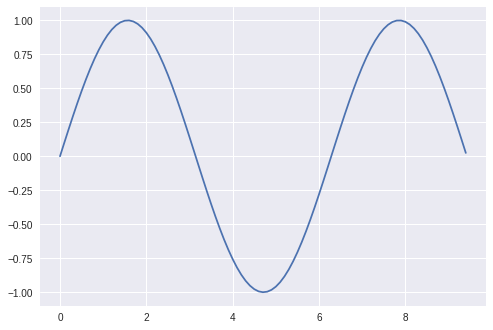

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
xt = np.arange(0, 3 * np.pi, 0.1)
yt = np.sin(xt)

# Plot the points using matplotlib
plt.plot(xt, yt)
plt.show()  # You must call plt.show() to make graphics appear.

Running this code produces the following plot:

<div class='fig figcenter fighighlight'>
  <img src='assets/sine.png'>
</div>

With just a little bit of extra work we can easily plot multiple lines
at once, and add a title, legend, and axis labels:

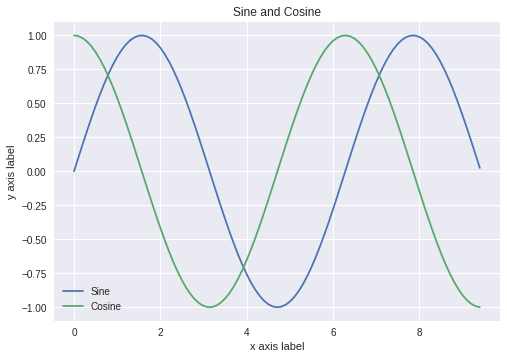

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
xt = np.arange(0, 3 * np.pi, 0.1)
y_sint = np.sin(xt)
y_cost = np.cos(xt)

# Plot the points using matplotlib
plt.plot(xt, y_sint)
plt.plot(xt, y_cost)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

<div class='fig figcenter fighighlight'>
  <img src='assets/sine_cosine.png'>
</div>

You can read much more about the `plot` function
[in the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

<a name='matplotlib-subplots'></a>

### Subplots
You can plot different things in the same figure using the `subplot` function.
Here is an example:

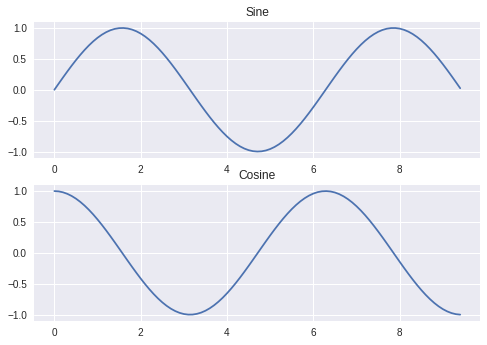

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Compute thexhand y coordinates for points on sine and cosine curves
xt = np.arange(0, 3 * np.pi, 0.1)
y_sint = np.sin(xt)
y_cost = np.cos(xt)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(xt, y_sint)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(xt, y_cost)
plt.title('Cosine')

# Show the figure.
plt.show()

<div class='fig figcenter fighighlight'>
  <img src='assets/sine_cosine_subplot.png'>
</div>

You can read much more about the `subplot` function
[in the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

<a name='matplotlib-images'></a>

### Images
You can use the `imshow` function to show images. Here is an example:

In [81]:
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

imgt = imread('assets/cat.jpg')
img_tintedt = imgt * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(imgt)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tintedt))
plt.show()

FileNotFoundError: ignored

<div class='fig figcenter fighighlight'>
  <img src='assets/cat_tinted_imshow.png'>
</div>